## Loan Amortization (Monthly Payment Calculation)
Purpose: Determines the fixed monthly payment required to repay a loan over a specified period at a given interest rate.
Key Inputs: Loan principal, annual interest rate, loan term (in years).
Output: Monthly payment.
Use Case: Useful for mortgage and car loan calculations to determine affordability and payment schedules.

In [3]:
# Loan Amortization Calculation (Monthly Payment)
def loan_amortization(principal, annual_rate, years):
    # Convert annual interest rate to monthly
    monthly_rate = annual_rate / 12 / 100
    # Calculate the number of monthly payments
    n_payments = years * 12
    # Calculate the monthly payment
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate) ** n_payments) / ((1 + monthly_rate) ** n_payments - 1)
    
    return round(monthly_payment, 2)

# Example Usage
# INPUT
principal = float(input("Enter the principal loan amount ($): "))  # Example: 200000
annual_rate = float(input("Enter the annual interest rate (%): "))  # Example: 5
years = int(input("Enter the loan term (in years): "))  # Example: 30

# OUTPUT
monthly_payment = loan_amortization(principal, annual_rate, years)
print(f"Monthly Payment: ${monthly_payment}")

Enter the principal loan amount ($): 1000
Enter the annual interest rate (%): 10
Enter the loan term (in years): 5
Monthly Payment: $21.25


Enter the loan principal ($): 1000000000
Enter the annual interest rate (%): 10
Enter the loan term (in years): 5


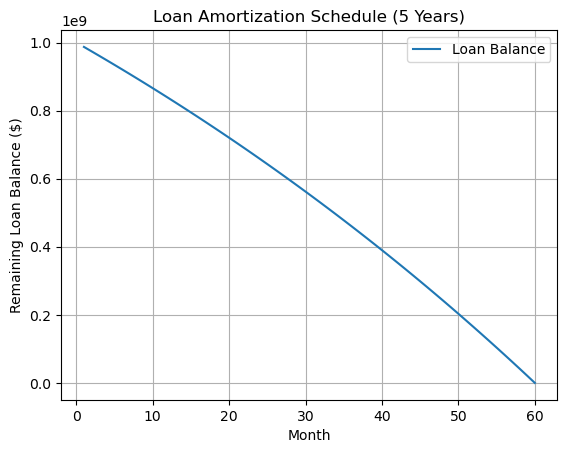

Monthly Payment: $21247044.71


In [10]:
import matplotlib.pyplot as plt

def loan_amortization(principal, annual_rate, years):
    # Convert annual interest rate to monthly
    monthly_rate = annual_rate / 12 / 100
    # Calculate the number of monthly payments
    n_payments = years * 12
    # Calculate the monthly payment
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate) ** n_payments) / ((1 + monthly_rate) ** n_payments - 1)
    
    # Track the loan balance over time
    balances = []
    balance = principal
    for month in range(1, n_payments + 1):
        interest_payment = balance * monthly_rate
        principal_payment = monthly_payment - interest_payment
        balance -= principal_payment
        balances.append(balance)
    
    # Plot loan balance over time
    plt.plot(range(1, n_payments + 1), balances, label="Loan Balance")
    plt.title(f"Loan Amortization Schedule ({years} Years)")
    plt.xlabel("Month")
    plt.ylabel("Remaining Loan Balance ($)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Output
    return round(monthly_payment, 2)

# Input
principal = float(input("Enter the loan principal ($): "))  # Principal loan amount
annual_rate = float(input("Enter the annual interest rate (%): "))  # Annual interest rate
years = int(input("Enter the loan term (in years): "))  # Loan term in years

# Output
monthly_payment = loan_amortization(principal, annual_rate, years)
print(f"Monthly Payment: ${monthly_payment}")


## Weighted Average Cost of Capital (WACC)
Purpose: Measures a company's cost of capital, considering both equity and debt financing, adjusted for the corporate tax rate.
Key Inputs: Market value of equity and debt, cost of equity, cost of debt, tax rate.
Output: WACC percentage.
Use Case: Helps businesses evaluate investment opportunities and make decisions about financing structures.

In [4]:
# Weighted Average Cost of Capital (WACC) Calculation
def wacc(equity_value, debt_value, cost_of_equity, cost_of_debt, tax_rate):
    # Calculate total market value of the company's financing
    total_value = equity_value + debt_value
    # Calculate WACC
    wacc_value = (equity_value / total_value) * cost_of_equity + (debt_value / total_value) * cost_of_debt * (1 - tax_rate)
    
    return round(wacc_value * 100, 2)  # Return as percentage

# Example Usage
# INPUT
equity_value = float(input("Enter the market value of equity ($): "))  # Example: 8000000
debt_value = float(input("Enter the market value of debt ($): "))  # Example: 2000000
cost_of_equity = float(input("Enter the cost of equity (%): "))  # Example: 10
cost_of_debt = float(input("Enter the cost of debt (%): "))  # Example: 5
tax_rate = float(input("Enter the corporate tax rate (%): "))  # Example: 30

# OUTPUT
wacc_value = wacc(equity_value, debt_value, cost_of_equity, cost_of_debt, tax_rate)
print(f"WACC: {wacc_value}%")


Enter the market value of equity ($): 100000
Enter the market value of debt ($): 10
Enter the cost of equity (%): 2
Enter the cost of debt (%): 3
Enter the corporate tax rate (%): 4
WACC: 199.89%


Enter the market value of equity ($): 1000000000
Enter the market value of debt ($): 1778839200
Enter the cost of equity (%): 50
Enter the cost of debt (%): 35
Enter the corporate tax rate (%): 17.7


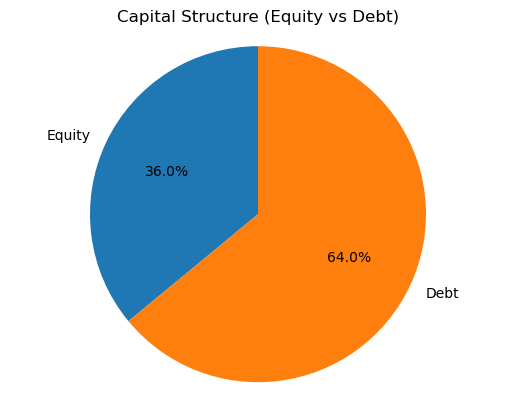

WACC: 36.43%


In [12]:
import matplotlib.pyplot as plt

def wacc(equity_value, debt_value, cost_of_equity, cost_of_debt, tax_rate):
    total_value = equity_value + debt_value
    wacc_value = (equity_value / total_value) * cost_of_equity + (debt_value / total_value) * cost_of_debt * (1 - tax_rate)
    
    # Visualize the capital structure
    labels = ['Equity', 'Debt']
    sizes = [equity_value, debt_value]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"Capital Structure (Equity vs Debt)")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # Output
    return round(wacc_value * 100, 2)

# Input
equity_value = float(input("Enter the market value of equity ($): "))  # Market value of equity
debt_value = float(input("Enter the market value of debt ($): "))  # Market value of debt
cost_of_equity = float(input("Enter the cost of equity (%): ")) / 100  # Cost of equity
cost_of_debt = float(input("Enter the cost of debt (%): ")) / 100  # Cost of debt
tax_rate = float(input("Enter the corporate tax rate (%): ")) / 100  # Corporate tax rate

# Output
wacc_value = wacc(equity_value, debt_value, cost_of_equity, cost_of_debt, tax_rate)
print(f"WACC: {wacc_value}%")


## Internal Rate of Return (IRR)
Purpose: Calculates the rate of return that makes the net present value (NPV) of an investment’s cash flows equal to zero.
Key Inputs: Cash flows (initial investment and subsequent returns).
Output: IRR percentage.
Use Case: Used to assess the profitability of investments or projects. A higher IRR indicates a more attractive investment.

In [25]:
# Internal Rate of Return (IRR) Calculation using numpy's IRR function
import numpy_financial as npf

def calculate_irr(cash_flows):
    # Use numpy's financial function to calculate IRR
    irr = npf.irr(cash_flows)  # Cash flows must be in the form of a list
    return round(irr * 100, 2)  # Return IRR as percentage

# Example Usage
# INPUT: User is prompted to input the cash flows separated by commas
while True:
    try:
        cash_flows = list(map(float, input("Enter the cash flows separated by commas (e.g., -100000, 40000, 40000, 40000): ").split(',')))
        
        # Ensure the first cash flow is negative (initial investment)
        if cash_flows[0] >= 0:
            print("The first cash flow should be a negative value (initial investment). Try again.")
            continue
        
        # OUTPUT: Calculate IRR
        irr_value = calculate_irr(cash_flows)
        print(f"IRR: {irr_value}%")
        break  # Exit the loop after a successful input

    except ValueError:
        print("Invalid input. Please enter valid numbers separated by commas.")



Enter the cash flows separated by commas (e.g., -100000, 40000, 40000, 40000): 100
The first cash flow should be a negative value (initial investment). Try again.
Enter the cash flows separated by commas (e.g., -100000, 40000, 40000, 40000): -100
IRR: nan%


Enter the cash flows separated by commas (e.g., -100000, 40000, 40000, 40000): 1000000


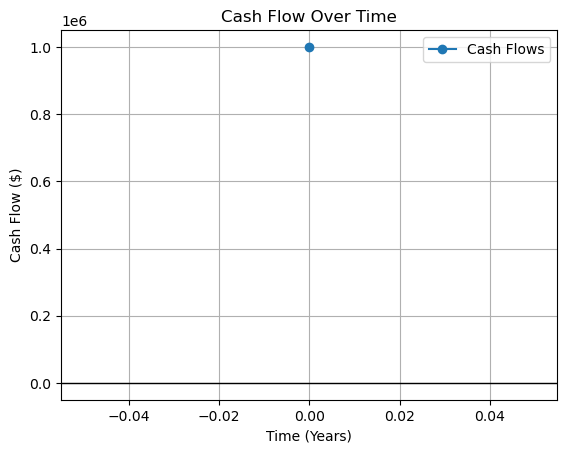

IRR: nan%


In [19]:
import matplotlib.pyplot as plt

def calculate_irr(cash_flows):
    # Use numpy-financial's irr function to calculate IRR
    irr = npf.irr(cash_flows)  # Cash flows must be in the form of a list
    # Plot the cash flows over time
    plt.plot(range(len(cash_flows)), cash_flows, label="Cash Flows", marker='o')
    plt.axhline(0, color='black', linewidth=1)
    plt.title("Cash Flow Over Time")
    plt.xlabel("Time (Years)")
    plt.ylabel("Cash Flow ($)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Output
    return round(irr * 100, 2)

# Input
cash_flows = list(map(float, input("Enter the cash flows separated by commas (e.g., -100000, 40000, 40000, 40000): ").split(',')))

# Output
irr_value = calculate_irr(cash_flows)
print(f"IRR: {irr_value}%")


## Price-to-Earnings (P/E) Ratio
Purpose: Measures the price investors are willing to pay for a company’s earnings. It indicates the market's expectations for future growth.
Key Inputs: Stock price, earnings per share (EPS).
Output: P/E ratio.
Use Case: Commonly used in equity analysis to assess whether a stock is overvalued or undervalued relative to its earnings.

In [7]:
# Price-to-Earnings (P/E) Ratio Calculation
def pe_ratio(stock_price, earnings_per_share):
    # Calculate P/E ratio
    pe_value = stock_price / earnings_per_share
    return round(pe_value, 2)

# Example Usage
# INPUT
stock_price = float(input("Enter the stock price per share ($): "))  # Example: 50
earnings_per_share = float(input("Enter the earnings per share (EPS) ($): "))  # Example: 5

# OUTPUT
pe_value = pe_ratio(stock_price, earnings_per_share)
print(f"P/E Ratio: {pe_value}")


Enter the stock price per share ($): 3
Enter the earnings per share (EPS) ($): 3
P/E Ratio: 1.0


Enter the stock price ($): 500
Enter the earnings per share (EPS) ($): 450


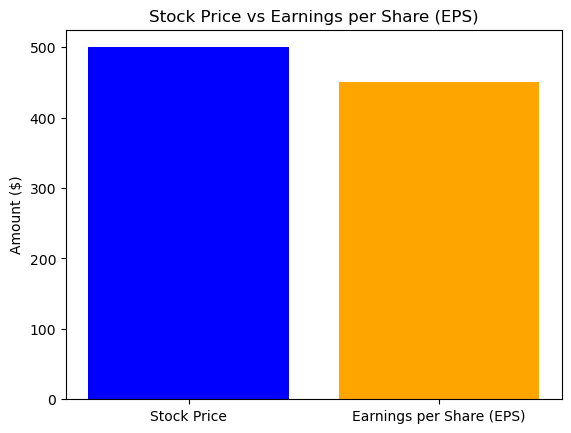

P/E Ratio: 1.11


In [16]:
import matplotlib.pyplot as plt

def pe_ratio(stock_price, earnings_per_share):
    pe_value = stock_price / earnings_per_share
    
    # Plot Stock Price vs. EPS
    labels = ['Stock Price', 'Earnings per Share (EPS)']
    values = [stock_price, earnings_per_share]
    plt.bar(labels, values, color=['blue', 'orange'])
    plt.title("Stock Price vs Earnings per Share (EPS)")
    plt.ylabel("Amount ($)")
    plt.show()

    # Output
    return round(pe_value, 2)

# Input
stock_price = float(input("Enter the stock price ($): "))  # Stock price per share
earnings_per_share = float(input("Enter the earnings per share (EPS) ($): "))  # Earnings per share

# Output
pe_value = pe_ratio(stock_price, earnings_per_share)
print(f"P/E Ratio: {pe_value}")


## Break-Even Analysis
Purpose: Calculates the number of units a company must sell to cover its fixed and variable costs, achieving neither a profit nor a loss.
Key Inputs: Fixed costs, selling price per unit, variable cost per unit.
Output: Break-even point (number of units).
Use Case: Used by businesses to set sales targets, assess profitability, and determine pricing strategies.

In [8]:
# Break-Even Analysis Calculation
def break_even(fixed_costs, selling_price_per_unit, variable_cost_per_unit):
    # Calculate the break-even point in units
    break_even_units = fixed_costs / (selling_price_per_unit - variable_cost_per_unit)
    return round(break_even_units, 2)

# Example Usage
# INPUT
fixed_costs = float(input("Enter the fixed costs ($): "))  # Example: 50000
selling_price_per_unit = float(input("Enter the selling price per unit ($): "))  # Example: 100
variable_cost_per_unit = float(input("Enter the variable cost per unit ($): "))  # Example: 60

# OUTPUT
break_even_units = break_even(fixed_costs, selling_price_per_unit, variable_cost_per_unit)
print(f"Break-Even Point: {break_even_units} units")

Enter the fixed costs ($): 43
Enter the selling price per unit ($): 43
Enter the variable cost per unit ($): 244
Break-Even Point: -0.21 units


Enter the fixed costs ($): 1000
Enter the selling price per unit ($): 950
Enter the variable cost per unit ($): 10


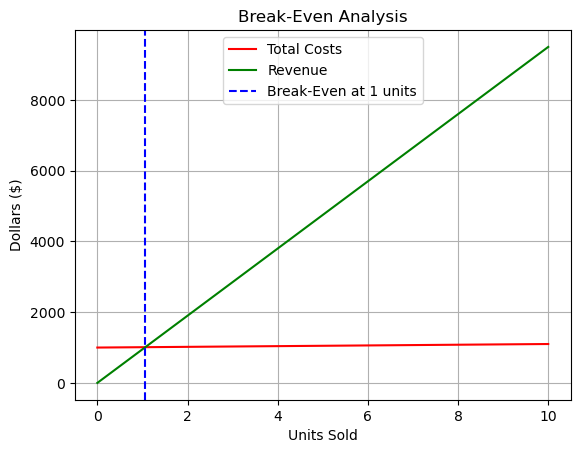

Break-Even Point: 1.06 units


In [17]:
import matplotlib.pyplot as plt

def break_even(fixed_costs, selling_price_per_unit, variable_cost_per_unit):
    break_even_units = fixed_costs / (selling_price_per_unit - variable_cost_per_unit)

    # Plot the cost and revenue functions
    units = range(0, int(break_even_units) + 10)
    total_costs = [fixed_costs + variable_cost_per_unit * u for u in units]
    revenue = [selling_price_per_unit * u for u in units]
    
    plt.plot(units, total_costs, label="Total Costs", color='red')
    plt.plot(units, revenue, label="Revenue", color='green')
    plt.axvline(x=break_even_units, color='blue', linestyle='--', label=f"Break-Even at {break_even_units:.0f} units")
    plt.title("Break-Even Analysis")
    plt.xlabel("Units Sold")
    plt.ylabel("Dollars ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Output
    return round(break_even_units, 2)

# Input
fixed_costs = float(input("Enter the fixed costs ($): "))  # Fixed costs
selling_price_per_unit = float(input("Enter the selling price per unit ($): "))  # Selling price per unit
variable_cost_per_unit = float(input("Enter the variable cost per unit ($): "))  # Variable cost per unit

# Output
break_even_units = break_even(fixed_costs, selling_price_per_unit, variable_cost_per_unit)
print(f"Break-Even Point: {break_even_units} units")
